In [110]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import augment_image
from src.dataset.load_datasets import get_dataset

x,y,filename = get_dataset("tuberculosis")


In [111]:
x.shape

(1265, 1224, 1632, 3)

In [112]:
patch_size = 28
nb_data = 100000

In [113]:
def generate_patch_dataset(dataset,patch_size,nb_patch):
    n,l,w,channels = dataset.shape
    
    img_idx = np.random.randint(0,n, size=nb_patch)
    l_min = np.random.randint(0, l-patch_size, size=nb_patch)
    w_min = np.random.randint(0, w-patch_size, size=nb_patch)
    
    l_indices = np.arange(patch_size).reshape(1, -1, 1) + l_min.reshape(-1, 1, 1)
    w_indices = np.arange(patch_size).reshape(1, 1, -1) + w_min.reshape(-1, 1, 1)
    
    data_generated = dataset[img_idx[:, None, None], l_indices, w_indices, :]
    #data_augmented = augment_image(data_generated)
    return data_generated, img_idx, l_min,w_min


In [114]:
data_x,idx,_,_ = generate_patch_dataset(x, patch_size, nb_data)
data_x = 2*data_x/255-1

In [115]:
from sklearn.decomposition import DictionaryLearning
def apply_dictionary_learning(data, n_components, alpha=1.0, max_iter=100, **kwargs):
    """
    Apply Dictionary Learning to a dataset.
    """
    # Flatten each sample if the data is multi-dimensional (e.g., images)
    n_data = data.shape[0]
    data_flat = data.reshape(n_data, -1)

    # Initialize Dictionary Learning model
    dict_learner = DictionaryLearning(
        n_components=n_components,
        alpha=alpha,
        max_iter=max_iter,
        random_state=42,
        **kwargs
    )

    # Fit the model and transform the data
    sparse_codes = dict_learner.fit_transform(data_flat)
    dictionary = dict_learner.components_

    return dictionary, sparse_codes


In [117]:
n_cmp = 10
dico,sparse_codes = apply_dictionary_learning(data_x, n_components=n_cmp, max_iter=100, n_jobs=10)
dico =  (1 + dico.reshape(n_cmp, patch_size,patch_size,3))/2

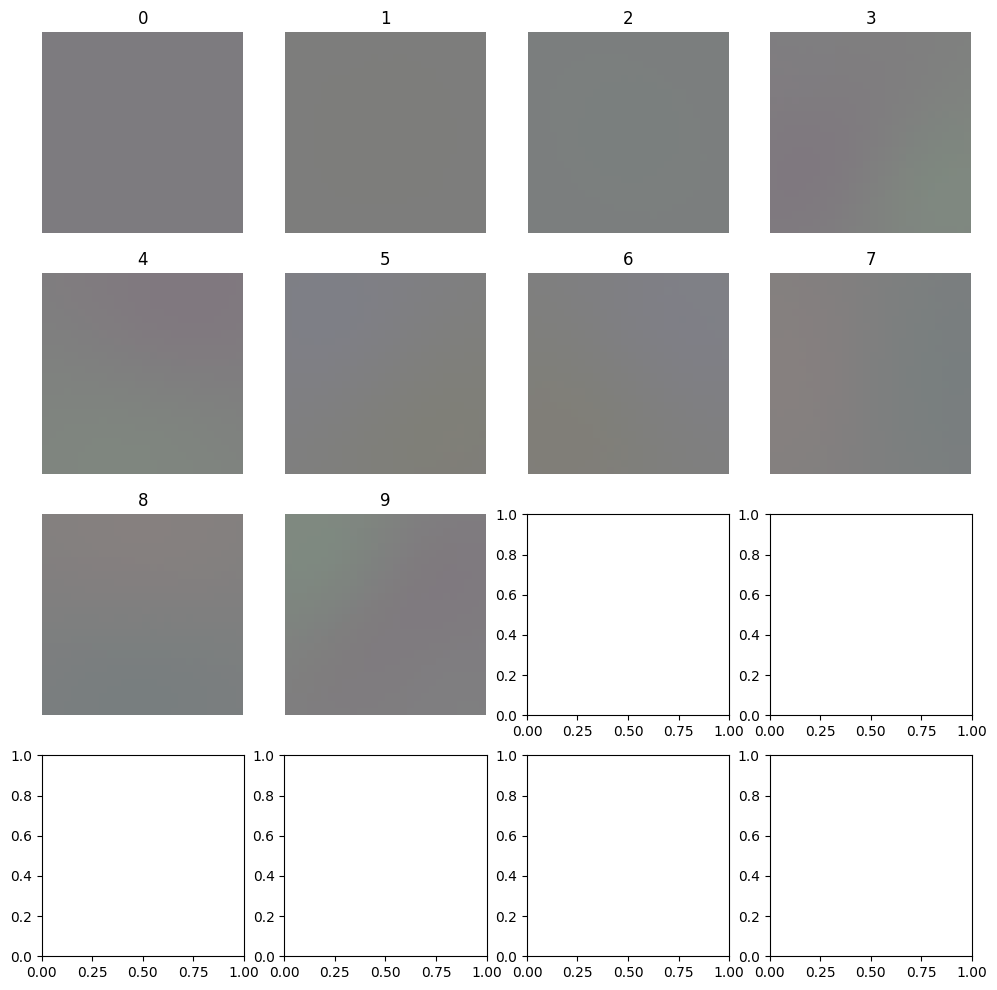

In [118]:

grid_size = int(np.ceil(np.sqrt(len(dico))))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
# Flatten the axes array for easy indexing
axes = axes.flatten()
for i,ax in enumerate(axes):
    if i>=len(dico):
        break
    ax.imshow(dico[i])
    ax.axis('off')
    ax.set_title(str(i))